In [1]:
import torch
import os

dir_name = os.path.abspath(".")
model_name = "linear1"

PATH = dir_name + "\\" + model_name + ".pt"

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = torch.jit.load(PATH, map_location=device)
model.eval()

RecursiveScriptModule(
  original_name=LinearRegressionModel
  (linear): RecursiveScriptModule(original_name=Linear)
)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.model_selection
from sklearn import preprocessing

df = pd.read_csv("..\medical_insurance.csv")
df.info()

x = df["bmi"].to_numpy()
y = df["charges"].to_numpy()

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.3, random_state=42)

x_test = x_test.astype(np.float32)
x_test = x_test.reshape(-1, 1)

y_test = y_test.astype(np.float32)
y_test = y_test.reshape(-1, 1)

data_normalizer = preprocessing.MinMaxScaler()

x_test = data_normalizer.fit_transform(x_test)
y_test = data_normalizer.fit_transform(y_test)
y_test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


array([[1.25562102e-01],
       [4.30647761e-01],
       [1.74153298e-01],
       [8.95029493e-03],
       [3.62575389e-02],
       [3.66888553e-01],
       [5.78540117e-02],
       [7.36616790e-01],
       [1.18678443e-01],
       [2.42171437e-02],
       [1.66500717e-01],
       [1.51198238e-01],
       [2.19724178e-02],
       [3.15360993e-01],
       [5.13749570e-02],
       [9.06259343e-02],
       [4.65497851e-01],
       [1.39494866e-01],
       [4.21305485e-02],
       [3.66134614e-01],
       [1.47633702e-01],
       [9.17007506e-01],
       [2.94866115e-01],
       [7.61431336e-01],
       [5.23326814e-01],
       [1.18531339e-01],
       [7.97251053e-03],
       [2.08921999e-01],
       [3.74807924e-01],
       [0.00000000e+00],
       [1.50966555e-01],
       [5.74048311e-02],
       [8.26338492e-03],
       [9.55297053e-03],
       [4.33625698e-01],
       [1.11796834e-01],
       [8.66940431e-03],
       [2.03392059e-02],
       [8.08359087e-02],
       [3.21436048e-01],


In [5]:
len(x_test), len(y_test)

(832, 832)

In [9]:
# inference model on whole test set
import torch.nn as nn

criterion = nn.MSELoss()

inputs = torch.from_numpy(x_test).to(device)
labels = torch.from_numpy(y_test).to(device)

outputs = model(inputs)

loss = criterion(outputs, labels)

loss

tensor(0.0439, device='cuda:0', grad_fn=<MseLossBackward0>)

In [12]:
# denormalize outputs
df_test = df[len(y_train):]
df_test

,age,sex,bmi,children,smoker,region,charges
1940,25,female,41.325,0,no,northeast,17878.90068
1941,28,male,23.800,2,no,southwest,3847.67400
1942,46,male,33.440,1,no,northeast,8334.58960
1943,34,male,34.210,0,no,southeast,3935.17990
1944,35,female,34.105,3,yes,northwest,39983.42595
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [19]:
# outputs_denormalized = data_normalizer.inverse_transform(outputs)
# outputs_list = [x.numpy() for x in outputs]
outputs_numpy = outputs.cpu().data.numpy()
outputs_denormalized = data_normalizer.inverse_transform(outputs_numpy)
outputs_denormalized

array([[ 1.19935137e+04],
       [ 7.96612646e+03],
       [-2.56975006e+02],
       [ 2.39322852e+04],
       [ 2.28911523e+04],
       [ 4.41254785e+03],
       [ 8.47110938e+03],
       [ 2.68000820e+04],
       [ 1.95682441e+04],
       [ 9.97981836e+03],
       [ 1.44560781e+04],
       [ 1.76106582e+04],
       [ 1.66505703e+04],
       [ 1.62578086e+04],
       [ 7.73545654e+03],
       [ 1.02167256e+04],
       [ 6.30778906e+03],
       [ 6.85017627e+03],
       [ 1.09648447e+04],
       [ 1.28226807e+04],
       [ 1.62578086e+04],
       [ 2.21804355e+04],
       [-8.86481323e+01],
       [ 2.16879199e+04],
       [ 1.25857754e+04],
       [ 1.13015020e+04],
       [-3.52377393e+03],
       [ 2.19435273e+04],
       [ 9.09454395e+03],
       [ 3.62078442e+03],
       [ 2.40569688e+04],
       [ 2.04349780e+03],
       [ 1.28226807e+04],
       [ 1.21244346e+04],
       [ 2.02166152e+04],
       [ 2.06280801e+04],
       [ 8.14692236e+03],
       [ 5.24171777e+03],
       [ 1.4

In [22]:
# df_test["charges_predicted"] = outputs_denormalized
df_test.loc[:, "charges_predicted"] = outputs_denormalized

In [23]:
df_test

,age,sex,bmi,children,smoker,region,charges,charges_predicted
1940,25,female,41.325,0,no,northeast,17878.90068,11993.513672
1941,28,male,23.800,2,no,southwest,3847.67400,7966.126465
1942,46,male,33.440,1,no,northeast,8334.58960,-256.975006
1943,34,male,34.210,0,no,southeast,3935.17990,23932.285156
1944,35,female,34.105,3,yes,northwest,39983.42595,22891.152344
...,...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180,9967.347656
2768,21,female,34.600,0,no,southwest,2020.17700,3820.288330
2769,19,male,26.030,1,yes,northwest,16450.89470,11875.059570
2770,23,male,18.715,0,no,northwest,21595.38229,21176.707031


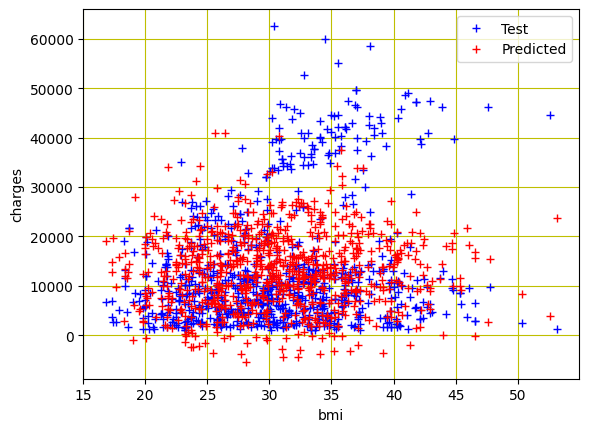

In [25]:
bmi = df_test["bmi"].to_numpy()
charges = df_test["charges"].to_numpy()
charges_predicted = df_test["charges_predicted"].to_numpy()

plt.plot(bmi, charges, "b+", label="Test")
plt.plot(bmi, charges_predicted, "r+", label="Predicted")
plt.xlabel("bmi")
plt.ylabel("charges")
plt.legend()
plt.grid(True, color="y")
plt.show()

In [26]:
# draw linear model on dataset
model

RecursiveScriptModule(
  original_name=LinearRegressionModel
  (linear): RecursiveScriptModule(original_name=Linear)
)

In [32]:
weights = model.state_dict()
weights

OrderedDict([('linear.weight', tensor([[0.7398]], device='cuda:0')),
             ('linear.bias', tensor([-0.1044], device='cuda:0'))])

In [42]:
m = weights.get("linear.weight").cpu().numpy()[0][0]
b = weights.get("linear.bias").cpu().numpy()[0]

m, b
# weights.get("linear.weight")

(0.73977965, -0.104406044)

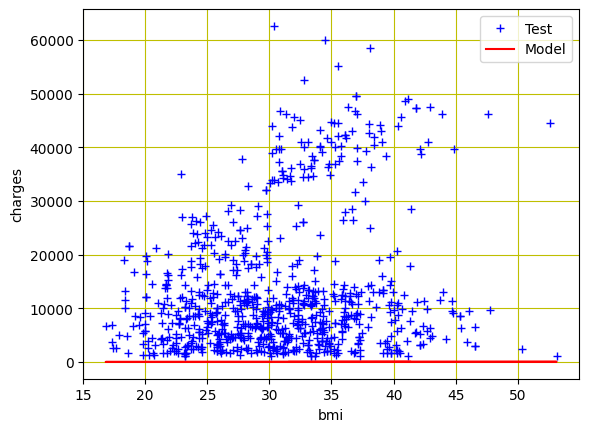

In [64]:
# m_denormalized = data_normalizer.inverse_transform(np.array(m).reshape(1,-1))[0][0]
# b_denormalized = data_normalizer.inverse_transform(np.array(b).reshape(1,-1))[0][0]
# m_denormalized, b_denormalized

plt.plot(bmi, charges, "b+", label="Test")
plt.plot(bmi, m*bmi+b, "r", label="Model", linestyle="-")
plt.xlabel("bmi")
plt.ylabel("charges")
plt.legend()
plt.grid(True, color="y")
plt.show()

In [62]:
m_denormalized = data_normalizer.inverse_transform(np.array(m).reshape(1,-1))[0][0]
b_denormalized = data_normalizer.inverse_transform(np.array(b).reshape(1,-1))[0][0]
m_denormalized, b_denormalized

(47468.004, -5419.014)